# Dimensionality Reduction using an Autoencoder

My interest in auto encoders began with the realization that they can encode inputs in a compressed format. This ability can be applied to 
    1. Dimensionality reduction
    2. Compression
    3. Generative Models(images, music)
    4. Denoising
I have most often dealt with the curse of dimensionality. I had to try this out to extract better representative dimensions. 
To accomplish this: 
    1. I have created a simple 2 layer Linear Autoencoder (No activation function).
    2. Also one interesting feature of this network is Output layer resembles input data. This is because the autoencoder encodes an input into a coding and decodes the coding to re-produce the same input.
    3. The Loss function checks the similarity between input and output also called as Reconstruction Loss.

My reference for this experiment is Aurelien Geron's book on tensorflow.

Nest steps: I also look forward to testing the dimensionality using a Non Linear autoencoder in the hopes of unearthing the manifold layer that can distinctly seperate all the classes. Note that, Linear PCA only provides linear orthogonal axes.
There is a great talk on the topic: https://www.youtube.com/watch?v=hbU7nbVDzGE

<img src="autoencoder.PNG">

At the bottom of the notebook, you can visualize the classes on a 2D plane that I have plotted using seaborn.

In [301]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [302]:
#Read input data and split into training and validation sets
X = pd.read_csv('glass.csv')
X.columns = ['Id', 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','label']

X_train = X.drop(['label','Id'], axis='columns', inplace=False)
y_train = X['label']

inputX, testX, inputY, testY = train_test_split(X_train, y_train, test_size=0.5, random_state=4)
inputX[:3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
63,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07
7,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
195,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01


In [303]:
inputY.reset_index( drop=True, inplace=True)
testY.reset_index( drop=True, inplace=True)
inputX.reset_index( drop=True, inplace=True)
testX.reset_index( drop=True, inplace=True)

In [304]:
n_inputs=9
n_hidden=2
n_outputs=n_inputs
learning_rate=0.01
training_epochs=100
n_samples=len(inputX)
batch_size=100

#Autoencoder for Linear PCA
x=tf.placeholder(tf.float32,shape=[None,n_inputs],name="ipip")
hidden=tf.layers.dense(x,n_hidden)
outputs=tf.layers.dense(hidden,n_outputs)
codings=hidden

In [305]:
#2D input data
inputX=np.array(inputX).reshape((-1,9))
inputX.shape

testX=np.array(testX).reshape((-1,9))
inputX.shape

(106, 9)

In [306]:
#Reconstruction Loss
reconstruction_loss=tf.reduce_mean(tf.square(outputs-x),name="losses")

In [307]:
#Optimizer
optimizer=tf.train.AdamOptimizer(learning_rate)
training_op=optimizer.minimize(reconstruction_loss)

In [308]:
#Training the Autoencoder
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        training_op.run(feed_dict={x: inputX})
    codings_val=codings.eval(feed_dict={x: testX})

In [309]:
#Dimensions learned by auto encoder
codings_val[:3]

array([[ 62.306263, -22.3335  ],
       [ 61.746334, -23.08355 ],
       [ 60.305912, -28.312094]], dtype=float32)

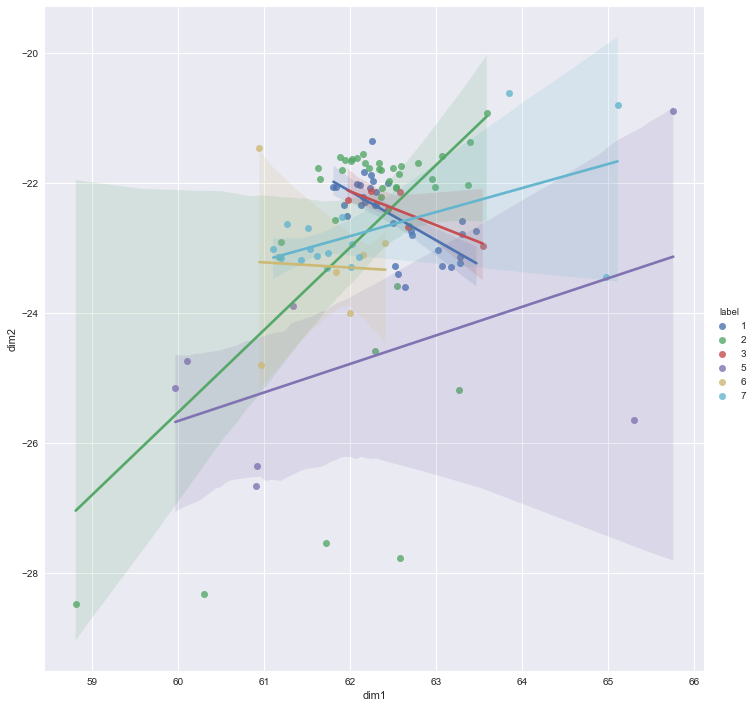

In [310]:
#PCA (Linear Autoencoder) with 2D representation
import seaborn as sns
sns.set()
pcaxdf=pd.DataFrame(codings_val)
pcaxdf['label']=testY
pcaxdf.columns=['dim1','dim2','label']

g = sns.lmplot(x="dim1", y="dim2", hue="label",
               truncate=True, size=10, data=pcaxdf)



In the above plot you can see that although some classes overlap a bit we have a decent seperation between the classes (atleast visually).
Seperating 7 classes on a single plane is a visual treat!